# SC2001 - Lab 1
### CCDS
#### Group 6

## Algorithm Analysis

---

### Insertion Sort
- **Best Case:** $O(n)$
- **Average Case:** $O(n^2)$
- **Worst Case:** $O(n^2)$

### Merge Sort
- **Best Case:** $O(n \log n)$
- **Average Case:** $O(n \log n)$
- **Worst Case:** $O(n \log n)$

## Hybrid Sort Analysis

---

### Worst Case
- For $n > S$:  
  $T(n) = 2T(n/2) + O(n)$
- For $n \leq S$:  
  $T(n) = O(n^2)$
- Subproblem size stops at $S$ (height $h = \log_2(n/S)$)

#### Cost Above Leaves
- At level $i$, there are $2^i$ nodes, each of size $n/2^i$
- Merge cost per node: $O(n/2^i)$
- Cost per level: $2^i \times O(n/2^i) = O(n)$
- Over $h$ levels: $O(n \log(n/S))$

#### Cost of Leaves
- Number of leaves: $n/S$
- Each leaf runs insertion sort: $O(S^2)$
- Total leaf cost: $\frac{n}{S} \times O(S^2) = O(nS)$

#### Total Cost
- $O(n \log(n/S)) + O(nS)$
- Simplified: $O(n \log(n/S) + nS)$

### Best Case
- Leaf cost: $\frac{n}{S} \times O(S) = O(n)$
- Total: $O(n \log(n/S)) + O(n)$
- Simplified: $O(n \log(n/S))$

---

**Part A - Implementations for Insertion Sort, Merge Sort and Hybrid Sort**

In [ ]:
 #Insertion Sort

def Insertion_Sort(array, left, right):
    global comparison_count
    for i in range(left+1, right+1):
        key = array[i]
        j = i - 1
        while j >= left:
            comparison_count += 1  #counting number of comparisons
            if array[j] > key:
               array[j+1] = array[j]
               j -= 1
            else:
                break
        array[j+1] = key

In [ ]:
#Merge Sort

def Merge_Sort(array, mid, left, right):
    global comparison_count
    L = array[left:mid+1].copy()
    R = array[mid+1:right+1].copy()
    i = j = 0
    k = left

    while i < len(L) and j < len(R):
        comparison_count += 1  #Counting number of comparisons
        if L[i] <= R[j]:
            array[k] = L[i]
            i += 1
        else:
            array[k] = R[j]
            j += 1
        k += 1

    while i < len(L):
        array[k] = L[i]
        i += 1
        k += 1

    while j < len(R):
        array[k] = R[j]
        j += 1
        k += 1

In [ ]:
def Hybrid_Sort(array, left, right, S = 20):
  #note that S can be adjusted as needed
    if right - left + 1 <= S:
        Insertion_Sort(array, left, right)
    else:
        mid = (left+right)//2
        Hybrid_Sort(array, left, mid, S)
        Hybrid_Sort(array, mid + 1, right, S)
        Merge_Sort(array, mid, left, right)

**Part B - Generation of Arrays with Data**

In [ ]:
#Import statements

import numpy as np
import time
import copy
import matplotlib.pyplot as plt

In [ ]:
#Generating arrays with data
dataSizes = []
for i in range (1,11):
    dataSizes.append(i*1000)
    dataSizes.append(i*10000)
    dataSizes.append(i*100000)
    dataSizes.append(i*1000000)

dataSizes = sorted(set(dataSizes)) #remove if any duplicates and to sort the input data sizes
print(dataSizes)

BASE_SEED = 50 #for reproducibilty
np.random.seed(BASE_SEED)

inputted_data = [] #makes an empty Python list to store each generated array

for j in dataSizes:
    new_data = np.random.randint(1,j+1, size=j)
    inputted_data.append(new_data)

#to verify that array works by printing parts of it
for k in range(len(inputted_data)):
    arr = inputted_data[k] #gives the kth array generated
    size = dataSizes[k] #to get the size for the array

    print("size =", size)
    print("minimum = ", int(arr.min()))
    print("maximum = ", int(arr.max()))
    print("first_few_elements = ", arr[:5].tolist()) #tolist is a NumPy array method that converts NumPy array into a python list
    print("last_few_elements = ", arr[-4:].tolist())






[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]
size = 1000
minimum =  1
maximum =  1000
first_few_elements =  [689, 481, 908, 110, 290]
last_few_elements =  [493, 578, 468, 704]
size = 2000
minimum =  3
maximum =  1999
first_few_elements =  [1763, 1026, 251, 935, 1878]
last_few_elements =  [145, 903, 1105, 291]
size = 3000
minimum =  2
maximum =  3000
first_few_elements =  [1915, 884, 1590, 2169, 71]
last_few_elements =  [2889, 2025, 2144, 2548]
size = 4000
minimum =  2
maximum =  4000
first_few_elements =  [2240, 2173, 2621, 917, 2930]
last_few_elements =  [2763, 2798, 2530, 2736]
size = 5000
minimum =  1
maximum =  5000
first_few_elements =  [1909, 2603, 1757, 1902, 4515]
last_few_elements =  [1382, 3075, 4851, 3588]
size = 6000
minimum =  1
maximum =  6

In [ ]:
#global variable to count key comparisons

comparison_count = 0

def reset_comparison_count():
    global comparison_count
    comparison_count = 0

def get_comparison_count():
    global comparison_count
    return comparison_count

**Part C(i)**


=== c)i): Fixed S = 20, Varying input size n ===
Current Array Size: 1000
Time Elapsed for Hybrid Sort: 0.0068 seconds
Number of Key Comparisons: 10239

Current Array Size: 2000
Time Elapsed for Hybrid Sort: 0.0155 seconds
Number of Key Comparisons: 22580

Current Array Size: 3000
Time Elapsed for Hybrid Sort: 0.0205 seconds
Number of Key Comparisons: 33824

Current Array Size: 4000
Time Elapsed for Hybrid Sort: 0.0291 seconds
Number of Key Comparisons: 49126

Current Array Size: 5000
Time Elapsed for Hybrid Sort: 0.0409 seconds
Number of Key Comparisons: 66597

Current Array Size: 6000
Time Elapsed for Hybrid Sort: 0.0621 seconds
Number of Key Comparisons: 73579

Current Array Size: 7000
Time Elapsed for Hybrid Sort: 0.0543 seconds
Number of Key Comparisons: 89805

Current Array Size: 8000
Time Elapsed for Hybrid Sort: 0.0699 seconds
Number of Key Comparisons: 106651

Current Array Size: 9000
Time Elapsed for Hybrid Sort: 0.0761 seconds
Number of Key Comparisons: 124486

Current Arra

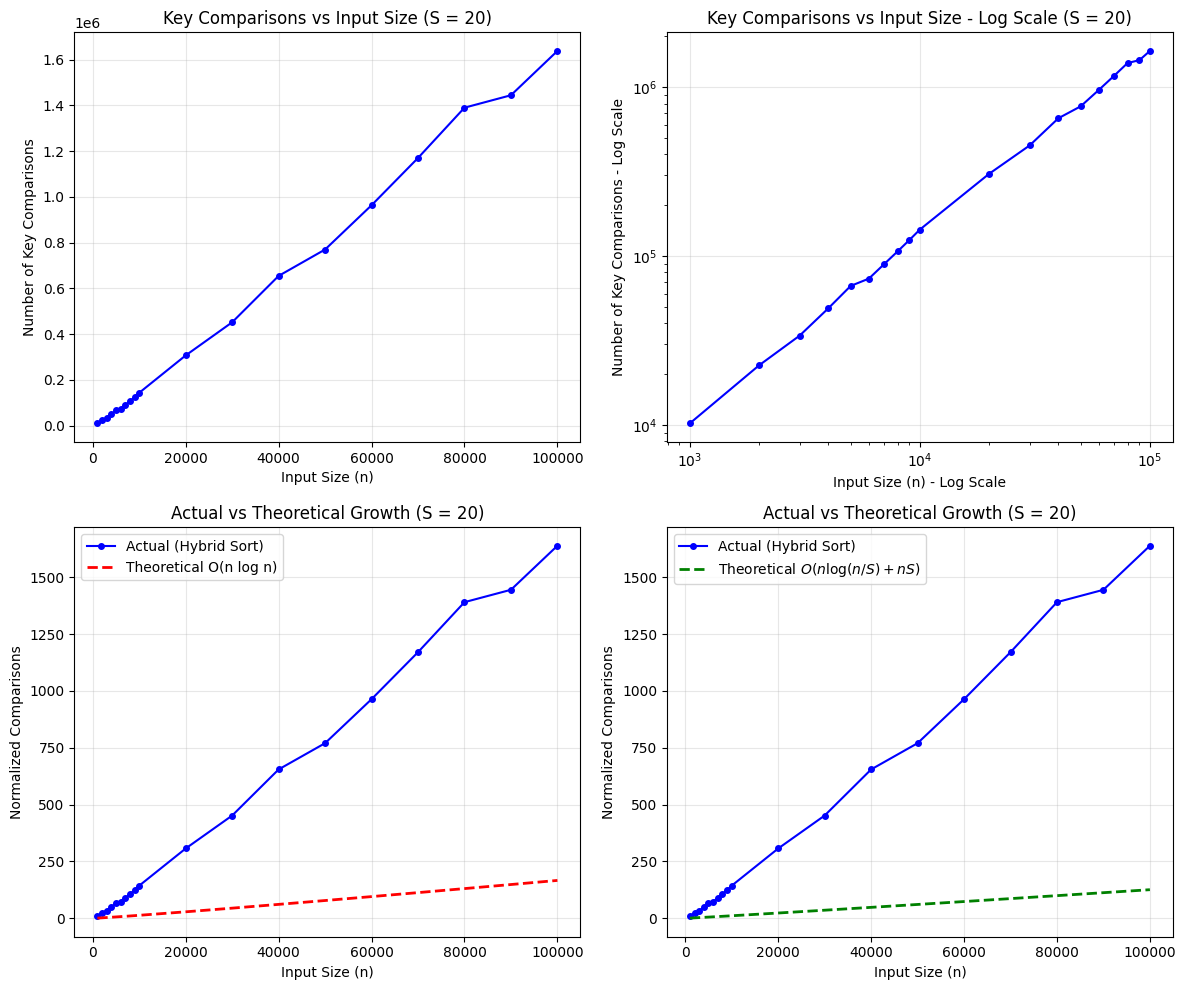


=== Growth Analysis (S = 20) ===
Size		Comparisons	Comp/n		Comp/(n*log2(n))	Comp/(n*log2(n/S)+nS)
-----------------------------------------------------------------------------------------------
    1000	     10239	10.24		1.027			0.399
    2000	     22580	11.29		1.030			0.424
    3000	     33824	11.27		0.976			0.414
    4000	     49126	12.28		1.026			0.444
    5000	     66597	13.32		1.084			0.476
    6000	     73579	12.26		0.977			0.434
    7000	     89805	12.83		1.004			0.451
    8000	    106651	13.33		1.028			0.465
    9000	    124486	13.83		1.053			0.480
   10000	    143615	14.36		1.081			0.496
   20000	    307047	15.35		1.075			0.512
   30000	    451908	15.06		1.013			0.493
   40000	    654645	16.37		1.071			0.529
   50000	    770058	15.40		0.987			0.492
   60000	    963538	16.06		1.012			0.509
   70000	   1170232	16.72		1.039			0.526
   80000	   1390105	17.38		1.067			0.544
   90000	   1444520	16.05		0.975			0.499
  100000	   1638145	16.38		0.986			0.507


In [ ]:
#Part c)i) Fixed S, Varying n
FIXED_THRESHOLD_VALUE = 20

#arrays storing X, Y Coordinates and time
fixedThresholdXCoordinates = []
fixedThresholdYCoordinates = []
fixedThresholdTimeCoordinates = []

print(f"\n=== c)i): Fixed S = {FIXED_THRESHOLD_VALUE}, Varying input size n ===")

#running sort over each array
for k in range(len(inputted_data)):
    if dataSizes[k] > 100000:  #skip arrays > 100 000
        continue
    copyOfArray = copy.deepcopy(inputted_data[k])
    arrayLength = len(copyOfArray)
    print("Current Array Size: {}".format(arrayLength))

    #timestamps
    startTimestamp = time.time()

    reset_comparison_count()

    Hybrid_Sort(copyOfArray, 0, len(copyOfArray)-1, FIXED_THRESHOLD_VALUE)

    endingTimestamp = time.time()

    #record key comparisons(Y axis) and array sizes(X axis)
    numKeyComparisons1 = get_comparison_count()
    fixedThresholdXCoordinates.append(arrayLength)
    fixedThresholdYCoordinates.append(numKeyComparisons1)
    fixedThresholdTimeCoordinates.append(endingTimestamp - startTimestamp)

    #print time taken and no. of key comparisons
    print("Time Elapsed for Hybrid Sort: {0:.4f} seconds".format(endingTimestamp - startTimestamp))
    print("Number of Key Comparisons: {}".format(numKeyComparisons1))
    print()

#graph plots
plt.figure(figsize=(12, 10))

#plot 1: Linear scale
plt.subplot(2, 2, 1)
plt.plot(fixedThresholdXCoordinates, fixedThresholdYCoordinates, 'bo-', markersize=4)
plt.xlabel('Input Size (n)')
plt.ylabel('Number of Key Comparisons')
plt.title(f'Key Comparisons vs Input Size (S = {FIXED_THRESHOLD_VALUE})')
plt.grid(True, alpha=0.3)

#plot 2: Log-log scale(for better trend visualization)
plt.subplot(2, 2, 2)
plt.loglog(fixedThresholdXCoordinates, fixedThresholdYCoordinates, 'bo-', markersize=4)
plt.xlabel('Input Size (n) - Log Scale')
plt.ylabel('Number of Key Comparisons - Log Scale')
plt.title(f'Key Comparisons vs Input Size - Log Scale (S = {FIXED_THRESHOLD_VALUE})')
plt.grid(True, alpha=0.3)

#plot 3: Empirical vs Theoretical O(n log n)
plt.subplot(2, 2, 3)
#normalize to show growth pattern
normalized_actual = [comp/fixedThresholdXCoordinates[0] for comp in fixedThresholdYCoordinates]
normalized_theoretical = [size * np.log2(size) / (fixedThresholdXCoordinates[0] * np.log2(fixedThresholdXCoordinates[0])) for size in fixedThresholdXCoordinates]

plt.plot(fixedThresholdXCoordinates, normalized_actual, 'bo-', label='Actual (Hybrid Sort)', markersize=4)
plt.plot(fixedThresholdXCoordinates, normalized_theoretical, 'r--', label='Theoretical O(n log n)', linewidth=2)
plt.xlabel('Input Size (n)')
plt.ylabel('Normalized Comparisons')
plt.title(f'Actual vs Theoretical Growth (S = {FIXED_THRESHOLD_VALUE})')
plt.legend()
plt.grid(True, alpha=0.3)

#plot 4: Empirical vs Theoretical O(n log(n/s) + ns)
plt.subplot(2, 2, 4)
normalized_actual = [comp/fixedThresholdXCoordinates[0] for comp in fixedThresholdYCoordinates]
normalized_theoretical_hybrid = [
    (size * np.log2(size / FIXED_THRESHOLD_VALUE) + size * FIXED_THRESHOLD_VALUE) /
    (fixedThresholdXCoordinates[0] * np.log2(fixedThresholdXCoordinates[0] / FIXED_THRESHOLD_VALUE) + fixedThresholdXCoordinates[0] * FIXED_THRESHOLD_VALUE)
    for size in fixedThresholdXCoordinates
]

plt.plot(fixedThresholdXCoordinates, normalized_actual, 'bo-', label='Actual (Hybrid Sort)', markersize=4)
plt.plot(fixedThresholdXCoordinates, normalized_theoretical_hybrid, 'g--', label=r'Theoretical $O(n \log(n/S) + nS)$', linewidth=2)
plt.xlabel('Input Size (n)')
plt.ylabel('Normalized Comparisons')
plt.title(f'Actual vs Theoretical Growth (S = {FIXED_THRESHOLD_VALUE})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#some growth analysis
print(f"\n=== Growth Analysis (S = {FIXED_THRESHOLD_VALUE}) ===")
print("Size\t\tComparisons\tComp/n\t\tComp/(n*log2(n))\tComp/(n*log2(n/S)+nS)")
print("-" * 95)

for size, comp in zip(fixedThresholdXCoordinates, fixedThresholdYCoordinates):
    if size > 0:
        comp_per_n = comp / size
        comp_per_nlogn = comp / (size * np.log2(size)) if size > 1 else 0
        comp_per_theoretical = comp / (size * np.log2(size / FIXED_THRESHOLD_VALUE) + size * FIXED_THRESHOLD_VALUE) if size > FIXED_THRESHOLD_VALUE else 0

        print(f"{size:8d}\t{comp:10d}\t{comp_per_n:.2f}\t\t{comp_per_nlogn:.3f}\t\t\t{comp_per_theoretical:.3f}")


**Part C(ii)**

In [ ]:
# (c)(ii)

import time, copy
import numpy as np
import matplotlib.pyplot as plt

def analysis_cii():
  analysis_sizes = [size for size in dataSizes if size <= 100000] or list(dataSizes)
  fixed_n = 10000
  original_index = dataSizes.index(fixed_n)

  S_values = list(range(2, 120))

  print(f"Analyzing (c)(ii) at fixed n = {fixed_n}")
  print(f"S sweep: {S_values}")
  print(f"\n{'S':<10} {'Comparisons':<15} {'n*log2(n)':<15} {'Ratio':<10} {'Time (s)':<10}")
  print("-" * 70)

  results = []
  theoretical = fixed_n * np.log2(fixed_n) if fixed_n > 1 else 0.0

  base_array = inputted_data[original_index]

  for S in S_values:
      # Copy the data (same n), and optionally reshuffle if you want more stability across S
      test_array = copy.deepcopy(base_array)

      reset_comparison_count()
      start_time = time.time()
      Hybrid_Sort(test_array, 0, fixed_n - 1, S)
      end_time = time.time()

      comparisons = get_comparison_count()
      cpu_time = end_time - start_time
      ratio = (comparisons / theoretical) if theoretical > 0 else 0.0

      results.append({
          'S': S,
          'comparisons': comparisons,
          'time': cpu_time,
          'theoretical': theoretical,
          'ratio': ratio,
          'n': fixed_n
      })

      print(f"{S:<10} {comparisons:<15} {theoretical:<15.0f} {ratio:<10.3f} {cpu_time:<10.6f}")

  return results, fixed_n


In [ ]:
def plot_results_cii(results, fixed_n):
    if not results:
        print("No results to plot.")
        return

    S_vals = [r['S'] for r in results]
    comps  = [r['comparisons'] for r in results]
    theoretical = fixed_n * np.log2(fixed_n) if fixed_n > 1 else 0.0

    plt.figure(figsize=(12, 6))
    plt.plot(S_vals, comps, 'bo-', label='Empirical (key comparisons)', markersize=6)
    plt.axhline(theoretical, color='r', linestyle='--', label='Theoretical ~ n log2 n')
    plt.xlabel('Threshold S')
    plt.ylabel('Number of Key Comparisons (fixed n)')
    plt.title(f'(c)(ii) Key Comparisons vs S (n={fixed_n})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def interpret_results_cii(results):
    if not results:
        print("No results to interpret.")
        return

    ratios = [r['ratio'] for r in results]
    comps  = [r['comparisons'] for r in results]
    S_vals = [r['S'] for r in results]

    print(f"\n{'='*60}")
    print("ANALYSIS AND INTERPRETATION — (c)(ii) Fixed n, vary S")
    print(f"{'='*60}")
    print(f"Statistical Summary (empirical/theoretical):")
    print(f"  Average ratio: {np.mean(ratios):.4f}")
    print(f"  Std dev      : {np.std(ratios):.4f}")
    print(f"  Min ratio    : {np.min(ratios):.4f}")
    print(f"  Max ratio    : {np.max(ratios):.4f}")

    # Best S by minimum comparisons
    min_idx = int(np.argmin(comps))
    best_S = S_vals[min_idx]
    best_comp = comps[min_idx]
    print(f"\nSuggested S (min comparisons): S={best_S}  (comparisons={best_comp})")



Analyzing (c)(ii) at fixed n = 10000
S sweep: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]

S          Comparisons     n*log2(n)       Ratio      Time (s)  
----------------------------------------------------------------------
2          120442          132877          0.906      0.092787  
3          120463          132877          0.907      0.090837  
4          120539          132877          0.907      0.104390  
5          121441          132877          0.914      0.085463  
6          121441          132877          0.914      0.086982  
7    

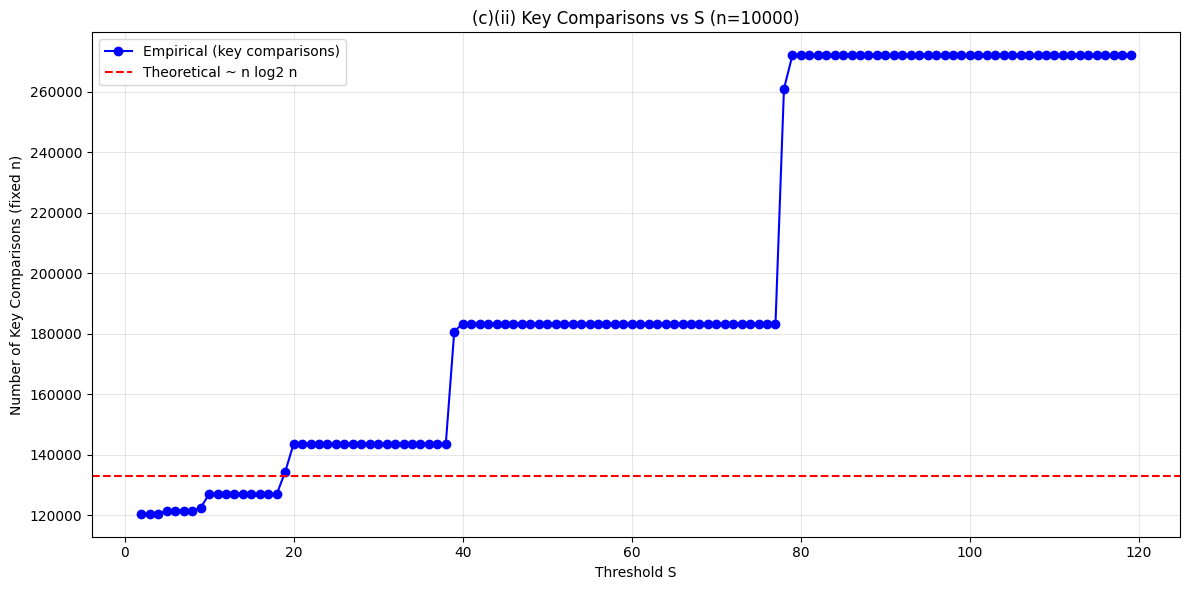


ANALYSIS AND INTERPRETATION — (c)(ii) Fixed n, vary S
Statistical Summary (empirical/theoretical):
  Average ratio: 1.5014
  Std dev      : 0.4327
  Min ratio    : 0.9064
  Max ratio    : 2.0477

Suggested S (min comparisons): S=2  (comparisons=120442)


In [ ]:
if __name__ == "__main__":

    print(f"\n{'='*60}\n")

    # running analysis
    results_cii, fixed_n_cii = analysis_cii()

    # plotting results
    plot_results_cii(results_cii, fixed_n_cii)

    # interpreting results
    interpret_results_cii(results_cii)

A staircase-like pattern is observed due to how the data is split in the mergeSort algorithm part.

The number of times it has to split is only changed when S crosses 2x (4, 8, 16, etc.)
whereas the Insertion sort part steadily increases as S gets bigger.

**Optimal S**

From our empirical results, our team found that a small value of *S = 2* is optimal. We obtained this by comparing S values agaisnt different datasets of varying sizes


However, by comparing CPU Runtime, we get the actual results.

Actual runtime includes recursion overhead, swaps, branch prediction, memory access, and cache effects. Insertion sort is simple, cache-friendly, and avoids deep recursion, so a larger threshold *(≈16)* runs faster even though it does more comparisons.

**Part D - Comparison with Original MergeSort**

In [ ]:
#Fixing optimal value of S as determined from previous parts

S_opt = 16

In [ ]:
def Merge_Sort_Original_Counted(a, left, right):
    if left >= right:
        return
    mid = (left + right)//2
    Merge_Sort_Original_Counted(a, left,  mid)
    Merge_Sort_Original_Counted(a, mid+1, right)
    Merge_Sort(a, mid, left, right)   # call the MERGE


In [ ]:
def Hybrid_Sort_Counted (array, left, right, S=20):
  if right - left + 1 <= S:                     #switch to insertion on small subarray
        Insertion_Sort(array, left, right)
        return

  mid = (left + right) // 2
  Hybrid_Sort_Counted(array, left,  mid, S) # sort left half
  Hybrid_Sort_Counted(array, mid + 1, right, S)  # sort right half
  Merge_Sort(array, mid, left, right) #merge halves

In [ ]:
import numpy as np, time
n=10_000_000
BASE_SEED = 50
np.random.seed(BASE_SEED + n)
base = np.random.randint(1, n+1, size=n, dtype=np.int32)

In [ ]:
#original mergesort
arr_ms = base.copy() #gives mergesort a fresh copy
reset_comparison_count() #starts counter at 0
t0 = time.perf_counter() #starts timer
Merge_Sort_Original_Counted(arr_ms, 0 , n-1) #run original mergesort
t1 = time.perf_counter() #stops timer
ms_comps = get_comparison_count() #total comparisons used by mergesort
ms_time = t1 - t0

In [ ]:
#hybrid with fixed S
arr_hy = base.copy()
reset_comparison_count()
t2 = time.perf_counter()
Hybrid_Sort_Counted(arr_hy, 0, n-1, S_opt)
t3 = time.perf_counter()
hy_comps = get_comparison_count()
hy_time = t3 - t2

In [ ]:
#report results
print(f"Merge Sort: {ms_time:.5f}s, comparisons={ms_comps}")
print(f"Hybrid Sort: (S={S_opt}); {hy_time:.5f}s, comparisons={hy_comps}")

Merge Sort: 182.97996s, comparisons=220103184
Hybrid Sort: (S=16); 164.16559s, comparisons=226415793


**Performance Comparison:**

- Hybrid Sort was roughly **11.5% faster** than Merge Sort due to less overhead and the use of insertion sort on small subarrays.
- Both Hybrid Sort and Merge Sort have **identical number of comparisons**.